#Letter recognition - classification

No collaboration

External sources:

*   [Sklearn documentation](https://scikit-learn.org/stable/)
*   [Matplotlib documentation](https://matplotlib.org/stable/index.html)
*   [Pandas documentation](https://pandas.pydata.org/docs/)

First, typical imports for the data manipulation and pre-defined models.

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, neighbors, naive_bayes, svm, metrics, base
import seaborn as sns

Generating seed for algorithms which use randomness (for reproducibility).

In [58]:
SEED = 2407741
RG = np.random.Generator(np.random.MT19937(np.random.SeedSequence(SEED)))

## Data presentation

We are going to use the dataset containing 16 characteristics of distorted images of capital english letters. Our goal is to create a model that given those 16 attributes, would be able to predict the intended letter. For more information, we recommend to visit the [dataset documentation](https://archive.ics.uci.edu/dataset/59/letter+recognition).

First, we load the dataset.

In [59]:
cols = [
     "lettr", "x-box", "y-box", "width",
	 "high", "onpix", "x-bar", "y-bar",
	 "x2bar", "y2bar", "xybar", "x2ybr",
	"xy2br", "x-ege", "xegvy", "y-ege", "yegvx"
    ]

df = pd.read_csv("letter-recognition.data", names=cols)
df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


Let us observe the datatypes of our attributes

In [60]:
df.dtypes

,0
lettr,object
x-box,int64
y-box,int64
width,int64
high,int64
onpix,int64
x-bar,int64
y-bar,int64
x2bar,int64
y2bar,int64


We see that each attribute is integral value (besides the target value). Let us also observe the target classes. (We will look at the frequencies of each class in the histograms later in this section).

In [61]:
np.unique( df["lettr"] )

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

And other characteristics of the dataset:

In [62]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


From min and max values, we see that all attributes are scaled between 0 and 15. We also observe that we have 20 000 samples.

Since we have a relatively high number of dimensions, let us have a look at the correlation matrix:

<Axes: >

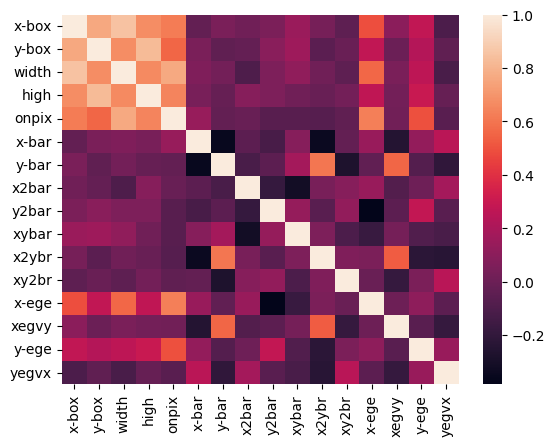

In [63]:
sns.heatmap( df.drop("lettr", axis=1).corr() )

We see that the attributes in the upper left corner of the matrix are correlated. Thus, if we struggle to train a model with reasonable performance of this high-dimensional data, we can try to reduce the dimensionality. The resulting lower-dimensional space brings several advantages, such as:

*   Less computational resources
*   Faster training
*   More "dense" data
*   Simpler model (less parameters)
*   Easier interpretation
*   Potentional removal of a lot of noise (which might otherwise lead to overfitting)

Finally, let us plot some of selected pairs of attributes in 2D projections of the dataset with color of given point representing the class. We also add a bit of normally distributed noise to reduce the overlap of points.

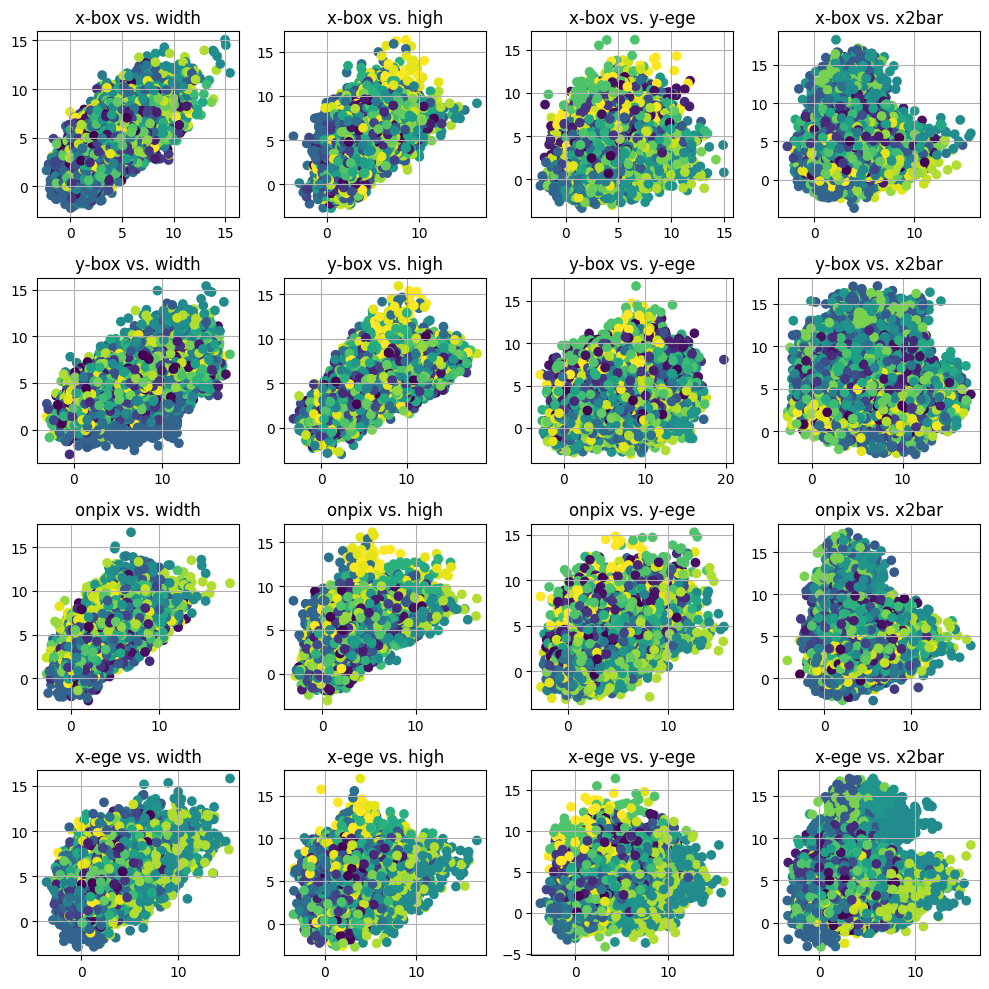

In [64]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

n = len(df)

attr1 = ["x-box", "y-box", "onpix", "x-ege"]
attr2 = ["width", "high", "y-ege", "x2bar"]

classes = np.unique( df["lettr"] )
class_map = dict( zip( classes, range( len(classes) ) ) )

colors = df["lettr"].map( lambda x: class_map[x] )

for i in range(4):
    for j in range(4):
        axes[i, j].scatter( df[attr1[i]] + RG.normal(0, 1, n) , df[attr2[j]]  + RG.normal(0, 1, n), c=colors )
        axes[i, j].set_title(f"{attr1[i]} vs. {attr2[j]}")
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

Since we have 20 000 points, and only 16x16 possible pairs of values in our projection (our attributes are integral), lot of points are overlapping, which makes it difficult to plot it.

Also, since the data are already normalized into interval [0, 15], we will try to create models directly on those values (meaning we will not perform normalization into [0, 1] interval). If the variables did not have the same range, we would definitely consider normalizing, since without normalization, attributes with bigger values might get artificially higher weight (for instance in distance computing with KNN classifier).

Finally, before training, we are going to split our dataset into train and test set in ratio 4:1.

In [65]:
X = df.drop("lettr", axis=1)
y = df["lettr"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=SEED)

For hyper-parameter tuning, we could split train set further into "real" train set and validation set. The model would not be trained on the validation set and would be evaluated multiple times on it to prevent over-fitting and tune hyper-parameters. First, we will try to create some models without it.

After the train-test split, we can create a histogram for whole dataset, and train/test sets respectively (showing number of samples belonging to each class).

In [66]:
def make_hist(y: pd.Series) -> None:
    y_counts = y.value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(y_counts.index, y_counts.values, color='skyblue')

The whole dataset:

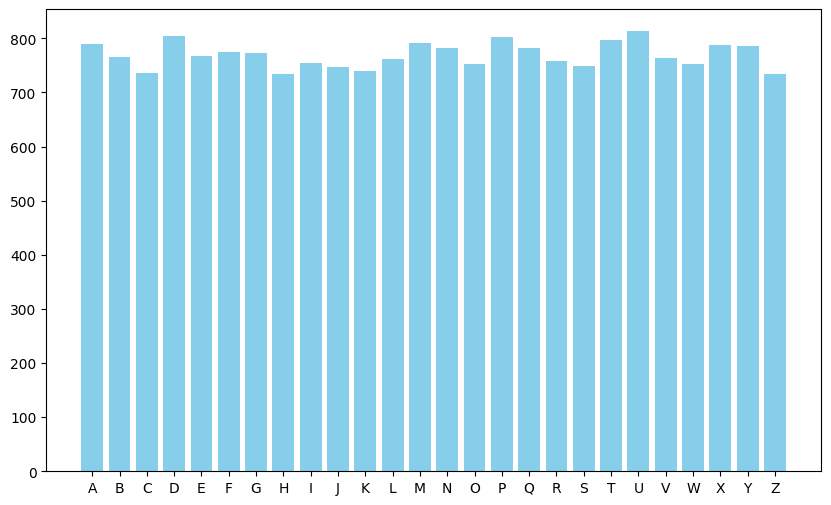

In [67]:
make_hist(y)

The train set:

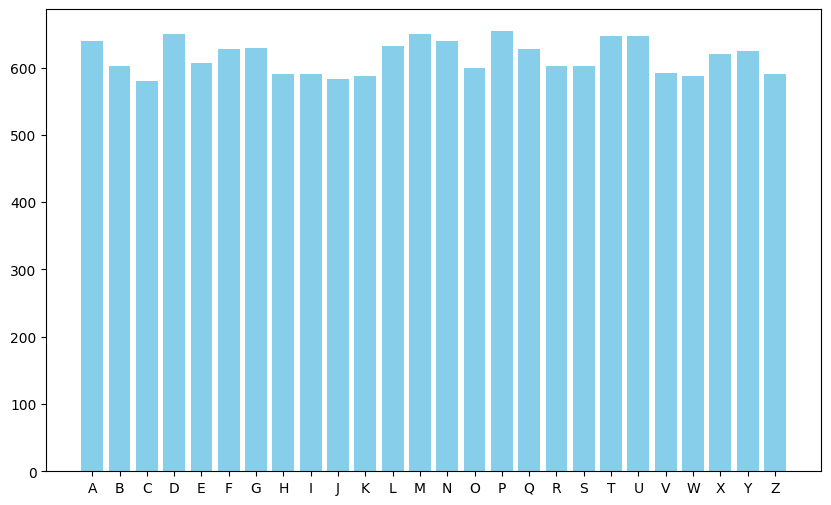

In [68]:
make_hist(y_train)

The test set:

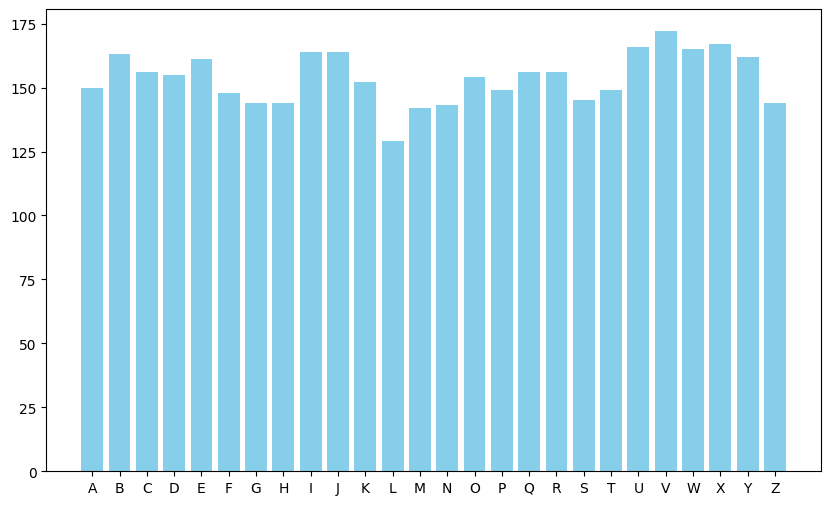

In [69]:
make_hist(y_test)

We observe that in each set, the classes are more or less balanced.

## Decision tree (DT)

Since we have 26 classes to predict, we will not try (almost) any binary models, because it is difficult to find any meaningfull binary boundary between groups of letters (We could try to separate one specific letter from the rest. Another idea is to separate vowels from consonants --- we will try that as a bonus).

We will try to train 3 DTs:


*   One with the default configuration
*   One with the entropy as split measure
*   One with regularization - we set the minimum number of samples required to split an internal node to 20 (value selected by observation)

In [70]:
dt_default = tree.DecisionTreeClassifier()
dt_entropy = tree.DecisionTreeClassifier(criterion="entropy")
dt_regularized = tree.DecisionTreeClassifier(min_samples_split=20)

dt_default.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)
dt_regularized.fit(X_train, y_train)

dt_models = { "DT_default": dt_default, "DT_entropy": dt_entropy, "DT_regularized": dt_regularized }

Let us observe the height of obtained trees:

In [71]:
for t in [ dt_default, dt_entropy, dt_regularized ]:
    print(t.tree_.max_depth)

28
20
24


We see that the trees are too deep to be visualized meaningfully in this notebook. Also, the regularized tree is deeper than the one using entropy as split criterion.

We will evaluate them together with other models in evaluation section.

Finally, notice that to correctly classify each class (out of 26 classes), we need our tree to have 26 leaves. Assuming it is a balanced binary tree (whose height is logarithmic to the number of nodes), the number of leaves is approximately 2^(h), where h is the height of the tree. This means, that the height has to be approximately log_2(26) .= 5.

## K nearest neibourghs (KNN):

Next, we are going to train 3 knn models:

*   One with k=1
*   One with k=5 (default)
*   One with k=10

As we grow the value of k, we expect that the model will be less prone to unusual values.

In [72]:
k1 = neighbors.KNeighborsClassifier(n_neighbors=1)
k5 = neighbors.KNeighborsClassifier(n_neighbors=5)
k10 = neighbors.KNeighborsClassifier(n_neighbors=10)

k1.fit(X_train, y_train)
k5.fit(X_train, y_train)
k10.fit(X_train, y_train)

knn_models = { "k1": k1, "k5": k5, "k10": k10 }

## Naïve bayes classifier (NB)

Next, we are going to train Naïve bayes model, we will try 2 models:

*  One will model probabilities with gaussian distribution (i.e. assuming continuous attributes)
*   One will model probabilities assuming discrete values (0...15) with Laplace smoothing



In [73]:
nbg = naive_bayes.GaussianNB()
nbl = naive_bayes.MultinomialNB()

nbg.fit(X_train, y_train)
nbl.fit(X_train, y_train)

nb_models = { "nbg": nbg, "nbl": nbl }

## Bonus

Finally, we will train three models to distinct between vowels and consonants:

*   Linear SVM
*   Polynomial SVM with (degree=2)
*   Decision tree with default configuration



First, we create new labels (we model vowels as negative class and consonants as positive one):

In [74]:
vowels = [ "A", "E", "I", "O", "U" ]
y_train_vc = y_train.map(lambda x: 0 if x in vowels else 1)
y_test_vc = y_test.map(lambda x: 0 if x in vowels else 1)

Let us observe how balanced are those two classes (since there are less vowels in the alphabet, we expect that the dataset will not be balanced).

In [75]:
y_vc = pd.concat( [y_train_vc, y_test_vc] )

print( "Number of vowels: ", len(y_vc[ y_vc == 0 ]) )
print( "Number of consonants: ", len(y_vc[ y_vc == 1 ]) )

Number of vowels:  3878
Number of consonants:  16122


We see that there is a significant margin in our dataset between the two classes. We could solve this issue using more advanced sampling to ensure that models see instanes from both classes with equal probability.

Let us train the announced models.

In [76]:
lsvm = svm.LinearSVC()
csvm = svm.SVC(kernel="poly", degree=3)
rsvm = svm.SVC(kernel="rbf")
bdt = tree.DecisionTreeClassifier()

lsvm.fit(X_train, y_train_vc)
csvm.fit(X_train, y_train_vc)
rsvm.fit(X_train, y_train_vc)
bdt.fit(X_train, y_train_vc)

%timeit lsvm.fit(X_train, y_train_vc)
%timeit csvm.fit(X_train, y_train_vc)
%timeit rsvm.fit(X_train, y_train_vc)

bin_models = { "lsvm": lsvm, "csvm":csvm, "rsvm":rsvm, "bdt":bdt }

99.5 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.3 s ± 421 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.81 s ± 657 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Evaluation

In the last section, we evaluate the models. First, we select the best performing model from each type of models, and then compare those "winning" ones. Finally, we compare the performance of binary models.

### Multi-class evaluation

For multi-class classification, we are going to use accuracy only.

In [77]:
best_models = {}

In [78]:
def get_acc(models: dict[str, base.BaseEstimator]) -> None:
    for model in models:
        print(f"Accuracy of {model} = {metrics.accuracy_score(y_test, models[ model ].predict(X_test))}")

#### DT evaluation

Let us first compare the accuracy for each of the trained DTs (multi-class).

In [79]:
get_acc(dt_models)

Accuracy of DT_default = 0.87575
Accuracy of DT_entropy = 0.874
Accuracy of DT_regularized = 0.839


We observe that the best performance is achieved by DT using entropy criterion for splitting. However, the difference between its performance and the performance of default DT is not significant. On the other side, the entropy is also the shallowest model (Occam's razor suggests that this model will be able to generalize the most). But of course, the depth of the tree does not capture all its complexity.  Surprisingly, the worst performing model is the regularized one. It might be caused by incorrectly setting suboptimal regularization parameter value.

In [80]:
best_models["DT"] = dt_entropy

#### KNN evaluation

Let us continue with knn models. We evaluate them in the same manner as DT models.

In [81]:
get_acc(knn_models)

Accuracy of k1 = 0.95925
Accuracy of k5 = 0.953
Accuracy of k10 = 0.944


We see that all the knn models perform better than selected DT models. The best one is knn with k=1, however, the differences are even more subtle than for DT models. We also observe that with increasing value of k, the model performance starts to decrease.

In [82]:
best_models["KNN"] = k1

#### NB evaluation

We continue with NB models.

In [83]:
get_acc(nb_models)

Accuracy of nbg = 0.6495
Accuracy of nbl = 0.5545


We see that both NB models are performing poorly. The reason might be hidden in relatively high dimensionality of our data. Since there is a strong assumption of independence, this assumption might cause distortions with increasing dimensions.

Let us observe how do the models perform on train samples.

In [84]:
for model in nb_models:
    print(f"Accuracy of {model} = {metrics.accuracy_score(y_train, nb_models[ model ].predict(X_train))}")

Accuracy of nbg = 0.649875
Accuracy of nbl = 0.5479375


We see almost identical results. Since there is no improvement on training data, we suspect that this is the underfitting case of poor performance (systematic error).

In [85]:
best_models["NB"] = nbg

#### Final evaluation

Let us compare the best model of each type.

In [86]:
get_acc(best_models)

Accuracy of DT = 0.874
Accuracy of KNN = 0.95925
Accuracy of NB = 0.6495


We have already seen those values, so we can conclude that the best performing model on this dataset is KNN. To support this hypothesis, we could perform some sort of hyper-parameter tunning and evaluate models using more metrics.

We can also try to compute top k accuracy for the best models (i.e. check how many times is the correct answer between top k predictions of model (sorted by some measure of certainty). We choose the value of k to be 3.

In [87]:
for model in best_models:
    print(f"Top 3 accuracy of {model}: {metrics.top_k_accuracy_score(y_test, best_models[ model ].predict_proba(X_test))}")

Top 3 accuracy of DT: 0.87725
Top 3 accuracy of KNN: 0.9595
Top 3 accuracy of NB: 0.78125


We observe that in this case, the biggest improvement is achieved by NB classifier. Regarding the other two models, their scores remain almost intact.

### Binary evaluation

Now, we are going to evaluate our binary models. As the evaluation metrics, we are going to use:

*   Accuracy
*   Recall
*   Precision



In [88]:
def eval_model(model: base.BaseEstimator, positive=1) -> None:
    print(f"   Accuracy: {metrics.accuracy_score(y_test_vc, model.predict(X_test))}")
    print(f"   Recall: {metrics.recall_score(y_test_vc, model.predict(X_test), pos_label=positive)}")
    print(f"   Precision: {metrics.precision_score(y_test_vc, model.predict(X_test), pos_label=positive)}")

In [89]:
for model in bin_models:
    print(f"Performance of {model}:")
    eval_model(bin_models[ model ])
    print()

Performance of lsvm:
   Accuracy: 0.79475
   Recall: 0.9803432137285492
   Precision: 0.8056410256410257

Performance of csvm:
   Accuracy: 0.929
   Recall: 0.9868954758190328
   Precision: 0.928928046989721

Performance of rsvm:
   Accuracy: 0.93025
   Recall: 0.9965678627145086
   Precision: 0.9225880993645291

Performance of bdt:
   Accuracy: 0.9605
   Recall: 0.9728549141965679
   Precision: 0.9777359673878959



Regarding the accuracy score, we see that the worst performing model is the linear SVM. This suggests that the data are highly non-linear, thus, linear model (even with soft margin) would perform poorly. The best model regardin the accuracy is DT. However, RBF kernel SVM is performing also very well together with cubic SVM.

Regarding the recall score, we see that all models perform quite similar (the differences are negligible). This suggests that the models achieve low false-negative rates (since the recall values are high). This is not surprising, since the vowels are represented by the negative class. In our dataset, there is a significant imbalance between positive and negative classes (negative class in minority). Thus, it is intuitive that the model would not falsely predict a letter as a vowel since it has seen much more consonants, hence, it is more likely to predict letters as consonants. We suspect that the falsely positive rates would be higher (it is more likely that a vowel would be marked as a consonant).

Because of the imbalance in our data, even a model always predicting samples as consonants would achieve high accuracy (ratio of consonants to the all samples) and recall of 1 (no false negative predictions).

Regarding the precision score, again, we see that the DT model performs the best. We observe that the SVM models have higher false-positive rates.

Next, let us observe the metric values if we mark vowel as positive class:

In [90]:
for model in bin_models:
    print(f"Performance of {model}:")
    eval_model(bin_models[ model ], positive=0)
    print()

Performance of lsvm:
   Accuracy: 0.79475
   Recall: 0.04654088050314465
   Precision: 0.37

Performance of csvm:
   Accuracy: 0.929
   Recall: 0.6955974842767295
   Precision: 0.9294117647058824

Performance of rsvm:
   Accuracy: 0.93025
   Recall: 0.6628930817610063
   Precision: 0.9795539033457249

Performance of bdt:
   Accuracy: 0.9605
   Recall: 0.9106918238993711
   Precision: 0.8927250308261405



Expectedly, the recall values dropped significantly. Here, we also see the poor performance of linear SVM, which strongly imply that the data are highly non-linear.

Finally, let us plot confusion matrices for each model:

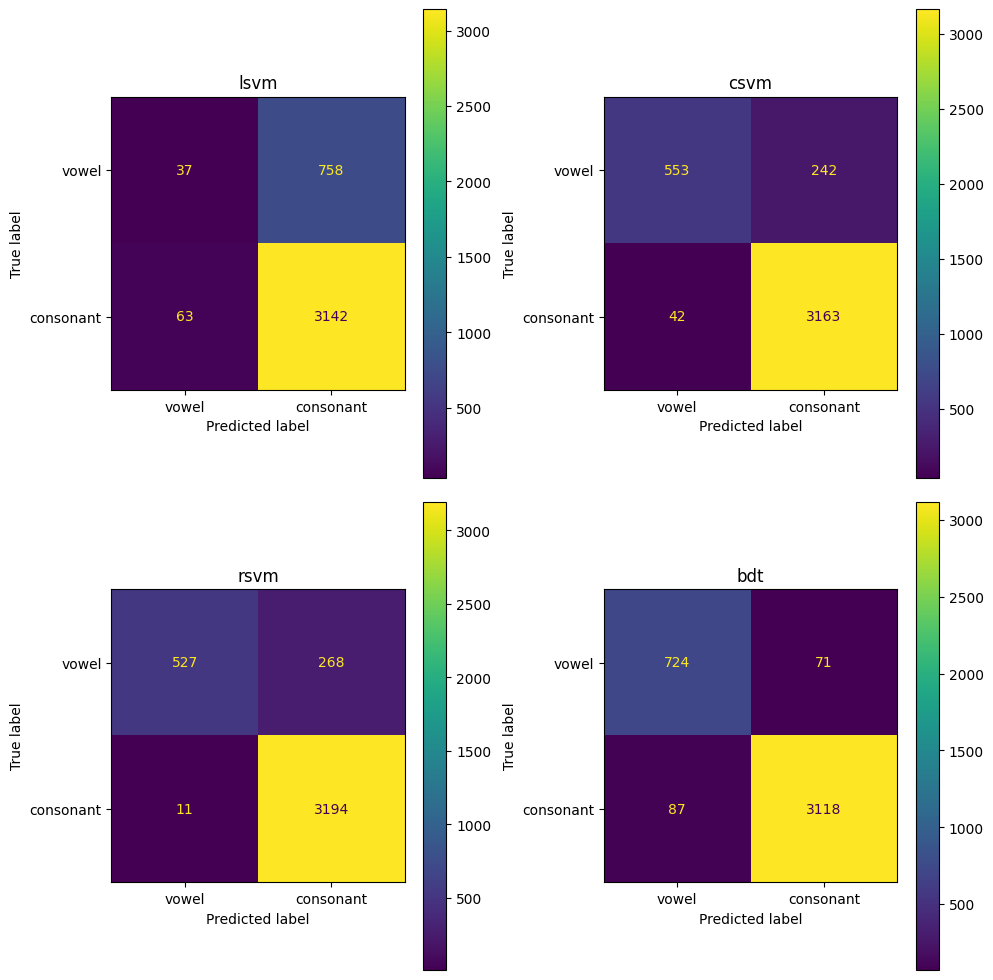

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, model in enumerate(bin_models):
    cm = metrics.confusion_matrix( y_test_vc, bin_models[model].predict(X_test) )
    disp = metrics.ConfusionMatrixDisplay(cm, display_labels=["vowel", "consonant"])
    axes[i].set_title(model)
    disp.plot(ax=axes[i])

plt.tight_layout()
plt.show()

We see that indeed all models (besides linear SVM) predict very little number of consonant samples falsely as vowel.